# Projeto 3 - Modelando um sistema mecânico: Pêndulo Elástico

## Importando bibliotecas

In [1]:
# Importando bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from math import *

## Definindo variáveis globais

In [2]:
g = 10                             # Aceleração da gravidade [m/s2]

r = 0.10                           # Raio da esfera [m]

A = pi*(r**2)                      # Área [m2]

m = np.arange(0.2, 10, 0.2)        # Massas esferas [kg]

k = 10                             # Constante elástica da mola [N/m]

l0 = 0.30                          # Comprimento da mola sem deformação [m]

rho_ar = 1                         # Densidade do ar [kg/m3]

Cd = 1.5                           # Coeficiente de arrasto

## Criando as funções

In [3]:
# Implementando função do modelo
# Simplificações feitas / abstração

    # Objeto considerado um ponto material
    # Considera resistência do ar

    # Objetivo: quanto tempo demora para um pendulo de diferentes massas parar?

def modelo(c0, tempo, m):

    x = c0[0]
    y = c0[1]
    vx = c0[2]
    vy = c0[3]

    l = ((x**2)+(y**2))**0.5                        # Comprimento da mola
    Fel = k * (l - l0)
    seno_theta = x/l            # seno theta (ângulo entre força elástica e eixo x)
    cosseno_theta = -y/l          # cosseno theta (ângulo entre força elástica e eixo y)

    Dx = (1/2)*(rho_ar*A*Cd*vx*((vx**2)+(vy**2))**0.5)    # Fórmula do arrasto decomposta no eixo x
    Dy = (1/2)*(rho_ar*A*Cd*vy*((vx**2)+(vy**2))**0.5)    # Fórmula do arrasto decomposta no eixo y

    dxdt = vx
    dydt = vy

    dvxdt = (1/m)*(-(Fel*seno_theta)-Dx)
    dvydt = (1/m)*(Fel*cosseno_theta-Dy-(m*g))

    dXdt = [dxdt, dydt, dvxdt, dvydt]
    
    return dXdt

## Condições iniciais, ODEINT e gráficos

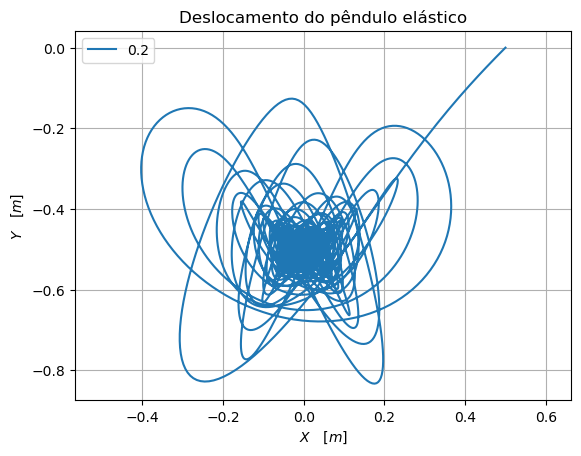

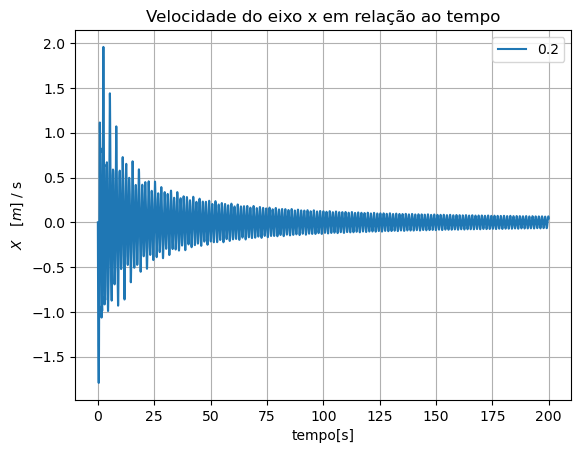

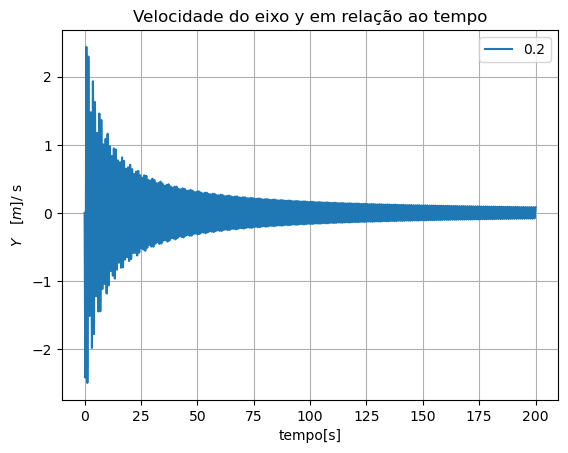

In [4]:
#posicoes iniciais
x0 = 0.5                         
y0 = 0
vx0 = 0
vy0 = 0

CI = [x0, y0, vx0, vy0]

tf = 200                              
dt = 1e-2                                 
tempo = np.arange(0, tf, dt)                            # Lista de tempo

resultado = odeint(modelo, CI, tempo, args = (m[0],))   # Realizando odeint apenas para a esfera de teste

pos_x = resultado[:,0]
pos_y = resultado[:,1]
velocidade_x = resultado[:,2]
velocidade_y = resultado[:,3]


plt.plot(pos_x, pos_y, label = m[0])
plt.title('Deslocamento do pêndulo elástico')
plt.axis('equal')
plt.xlabel('$X \quad [m]$')
plt.ylabel('$Y \quad [m]$')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(tempo, velocidade_x, label = m[0])
plt.title('Velocidade do eixo x em relação ao tempo')
plt.xlabel('tempo[s]')
plt.ylabel('$X \quad [m]$ / s')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(tempo, velocidade_y, label = m[0])
plt.title('Velocidade do eixo y em relação ao tempo')
plt.xlabel('tempo[s]')
plt.ylabel('$Y \quad [m]$/ s')
plt.legend()
plt.grid(True)
plt.show()



## Validação e dados experimentais

In [5]:
#validando x e y max, tempo para parar 95%

## Projetando gráfico conclusivo

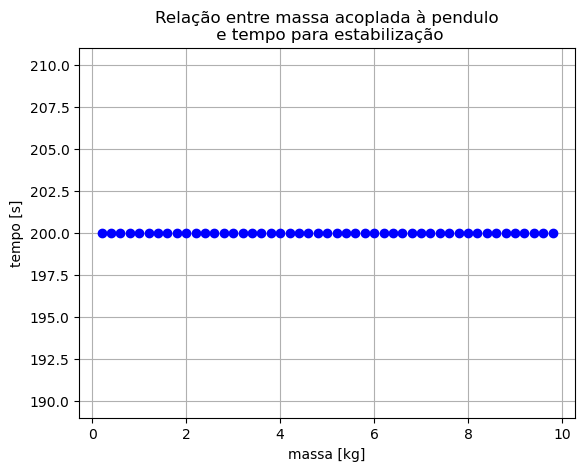

In [6]:
lista_tempos = []
vc = 0.03                     # Velocidade de corte, quando o pêndulo "para" 95% de seu movimento

for i in range(len(m)):
    result = odeint(modelo, CI, tempo, args = (m[i],))
    velo_x = resultado[:,2]
    
    for j in range(len(tempo)):
        if max(abs(velo_x[j:])) < vc:
            break
    lista_tempos.append(tempo[j])

            
plt.plot(m, lista_tempos, 'bo')    
plt.title('Relação entre massa acoplada à pendulo\n e tempo para estabilização')
plt.xlabel('massa [kg]')
plt.ylabel('tempo [s]')

plt.grid(True)
plt.show()

## Animando o sistema